# I. Numpy

### Импортируйте NumPy

In [11]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
np.array([0,0,0,0,0,1,0,0,0,0]).reshape((2, 5))

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [7]:
arr = np.flip(np.arange(10,50))
arr = np.where(arr % 2 != 0)
arr

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38]),)

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [5]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [36]:
arr = np.random.randint(0, 10, size=(4, 3, 2))
np.min(arr), np.max(arr)

(np.int64(0), np.int64(8))

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [25]:
arr1 = np.random.randint(0, 10, size=(6, 4))
arr2 = np.random.randint(0, 10, size=(4, 3))
np.dot(arr1, arr2)

array([[85, 82, 61],
       [84, 96, 63],
       [75, 68, 42],
       [91, 81, 60],
       [90, 89, 67],
       [69, 67, 34]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [27]:
arr = np.random.randint(0, 10, size=(7, 7))
np.std(arr)
arr.mean()

np.float64(4.163265306122449)

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [118]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Загрузите датасет Tips из набора датасетов seaborn

In [119]:
tips_data = sns.load_dataset("tips")

### Посмотрите на первые 5 строчек

In [33]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [37]:
rows, columns = tips_data.shape
rows, columns

(244, 7)

### Проверьте есть ли пропуски в данных

In [40]:
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [56]:
tips_data['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

### Найдите максимальное значение 'total_bill'

In [42]:
tips_data['total_bill'].max()

np.float64(50.81)

### Найдите количество курящих людей

In [43]:
tips_data[tips_data['smoker'] == 'Yes'].shape[0]

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [90]:
tips_data.groupby('day')['total_bill'].mean()

/tmp/ipykernel_12338/1836429827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_data.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [74]:
median_bill = tips_data['total_bill'].median()
filtered_tips_data = tips_data[tips_data['total_bill'] > median_bill]
filtered_tips_data.groupby('sex')['tip'].mean()


/tmp/ipykernel_12338/1928143183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_tips_data.groupby('sex')['tip'].mean()


sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [72]:
tips_data['smoker'] = tips_data['smoker'].map({'No': 0, 'Yes': 1})
tips_data['smoker']

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [1, 0]

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

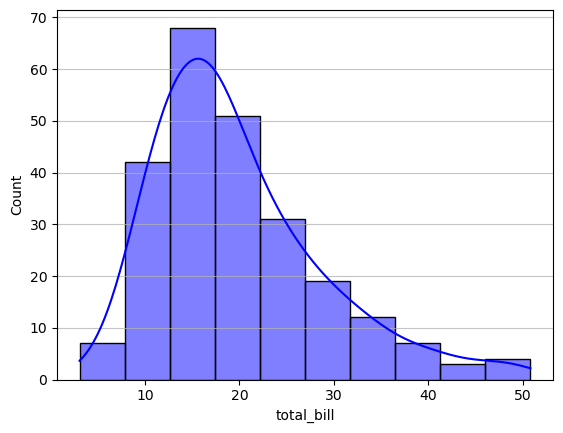

In [93]:
sns.histplot(tips_data['total_bill'], bins=10, kde=True, color='blue', edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

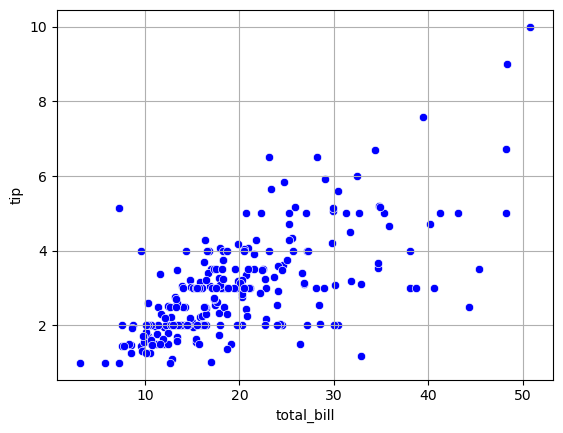

In [94]:
sns.scatterplot(x='total_bill', y='tip', data=tips_data, color='blue')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.grid()
plt.show()

### Постройте pairplot

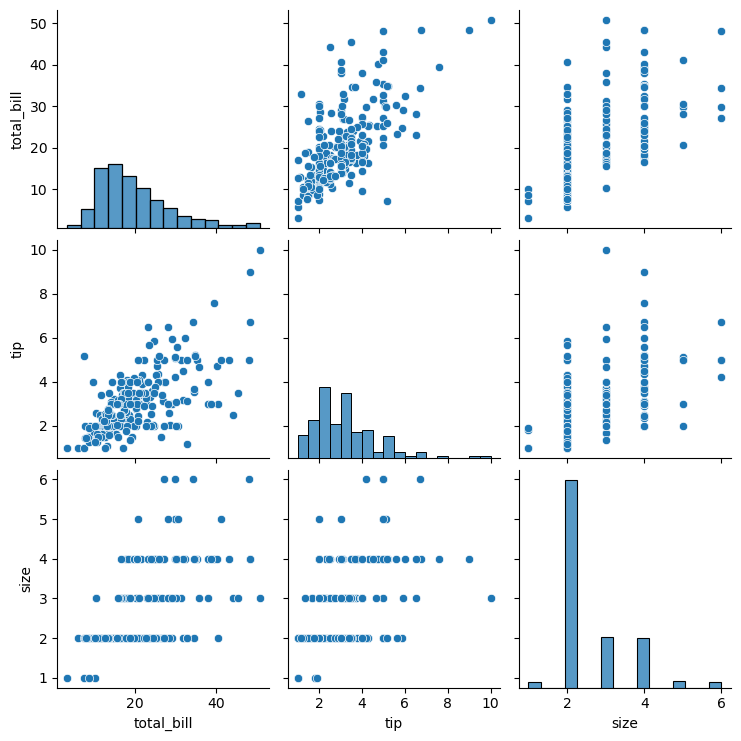

In [95]:
sns.pairplot(tips_data)
plt.show()

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

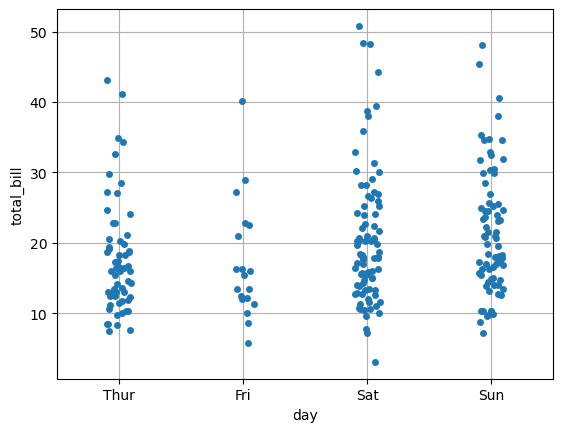

In [98]:
sns.stripplot(x='day', y='total_bill', data=tips_data, jitter=True)
plt.xlabel('day')
plt.ylabel('total_bill')
plt.grid()
plt.show()

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

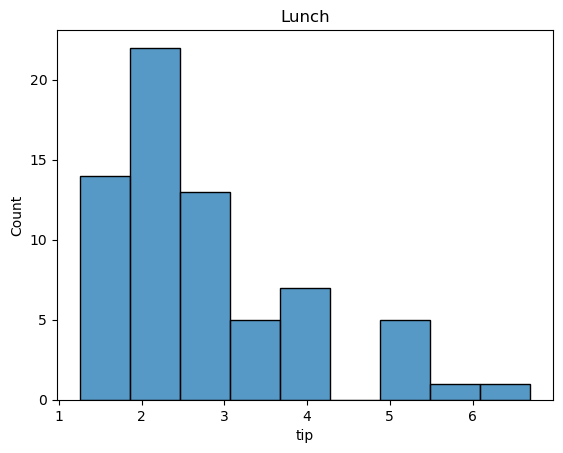

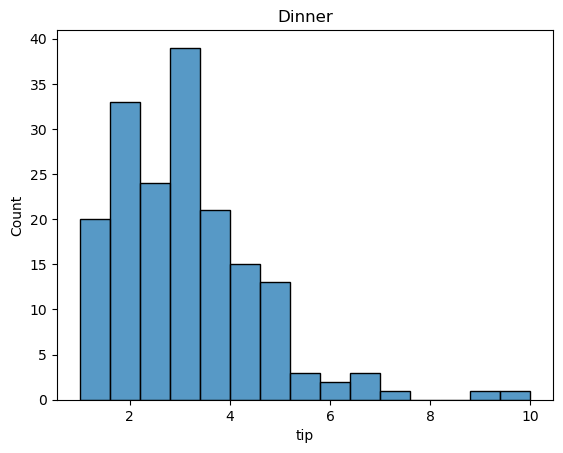

In [136]:
sns.histplot(tips_data[tips_data['time'] == 'Lunch'], x='tip')
plt.title('Lunch')
plt.show()

sns.histplot(tips_data[tips_data['time'] == 'Dinner'], x='tip')
plt.title('Dinner')
plt.show()

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

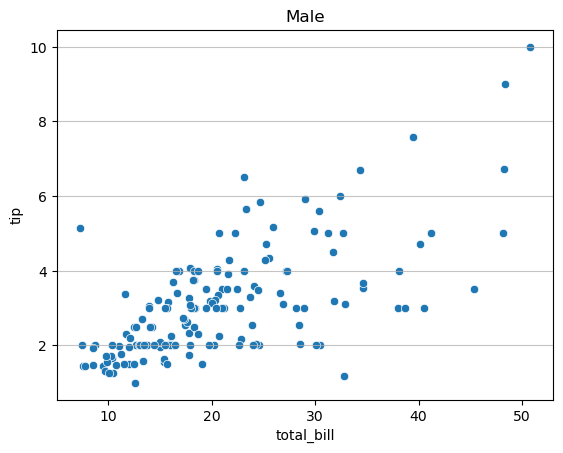

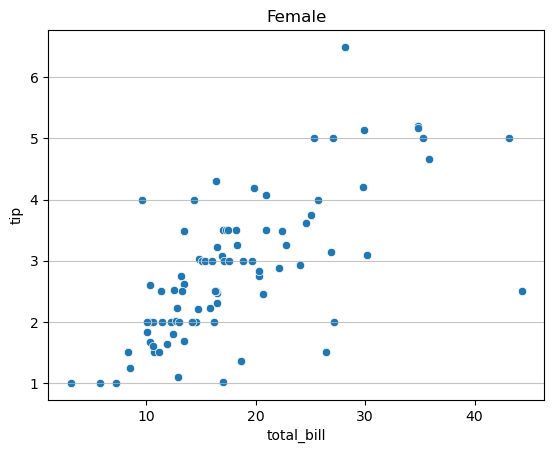

In [129]:
sns.scatterplot(tips_data[tips_data['sex'] == 'Male'], x='total_bill', y='tip')
plt.title('Male')
plt.grid(axis='y', alpha=0.75)
plt.show()
sns.scatterplot(tips_data[tips_data['sex'] == 'Female'], x='total_bill', y='tip')
plt.title('Female')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.